<a href="https://colab.research.google.com/github/Nurhidaya244012/PMA_MRTB1123/blob/main/A4a_PMA_MRTB_1123_Nurhidaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the newly uploaded Excel file
retail_file_path = "/content/RetailSalesPerformance.xlsx"
retail_df = pd.read_excel(retail_file_path)

# Display the first few rows to understand the structure
retail_df.head()


,Monthly Sales (RM),Store Size (sqm),Customer Satisfaction Score,Number of Competitors,Advertising Budget (RM),Number of Employees
0,298654.35,217.43,8.21,6,11751.78,19
1,405393.70,279.92,9.28,4,15756.43,19
2,367100.81,258.49,8.82,7,17253.07,22
3,294534.95,204.81,7.08,5,11490.61,22
4,331950.06,232.64,8.16,8,13988.20,19


In [ ]:
# Load the updated RetailSalesPerformance file
file_path = "/content/RetailSalesPerformance.xlsx"
df = pd.read_excel(file_path)

# Display column names to identify the dependent variable and available variables
df.columns.tolist()


['Monthly Sales (RM)',
 'Store Size (sqm)',
 'Customer Satisfaction Score',
 'Number of Competitors',
 'Advertising Budget (RM)',
 'Number of Employees']

In [ ]:
from scipy.stats import pearsonr
import numpy as np

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Create a matrix for p-values
pval_matrix = pd.DataFrame(np.ones(correlation_matrix.shape), columns=correlation_matrix.columns, index=correlation_matrix.index)

# Compute p-values for all pairs
for col1 in numeric_df.columns:
    for col2 in numeric_df.columns:
        if col1 != col2:
            _, pval = pearsonr(numeric_df[col1], numeric_df[col2])
            pval_matrix.loc[col1, col2] = pval
        else:
            pval_matrix.loc[col1, col2] = 0  # Perfect correlation with self

# Identify which variables are significantly correlated with the dependent variable (Monthly Sales)
dependent_var = 'Monthly Sales (RM)'
significant_vars = pval_matrix[dependent_var][pval_matrix[dependent_var] < 0.05].drop(dependent_var)
correlated_coeffs = correlation_matrix[dependent_var][significant_vars.index]

# Combine significant results
significant_results = pd.DataFrame({
    'Variable': significant_vars.index,
    'Correlation Coefficient': correlated_coeffs.values,
    'P-Value': significant_vars.values
}).sort_values(by='P-Value')

significant_results


,Variable,Correlation Coefficient,P-Value
0,Store Size (sqm),0.965425,1.113900e-29
2,Advertising Budget (RM),0.888314,7.690739e-18
3,Number of Employees,0.757960,1.848011e-10
1,Customer Satisfaction Score,0.741965,7.032110e-10


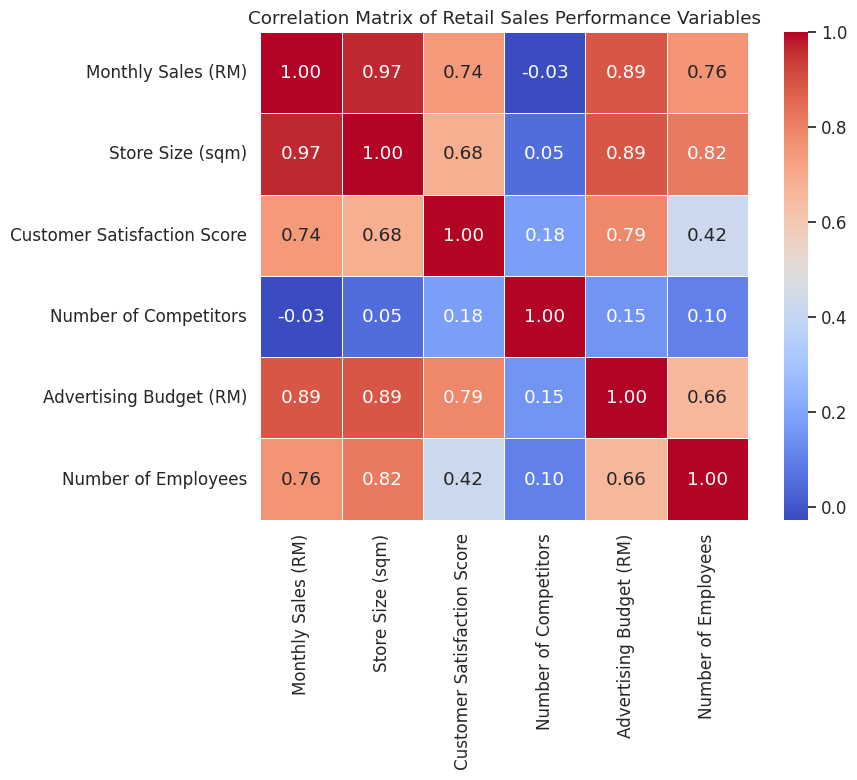

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel("RetailSalesPerformance.xlsx")

# Keep only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid", font_scale=1.1)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

plt.title("Correlation Matrix of Retail Sales Performance Variables")
plt.tight_layout()
plt.show()

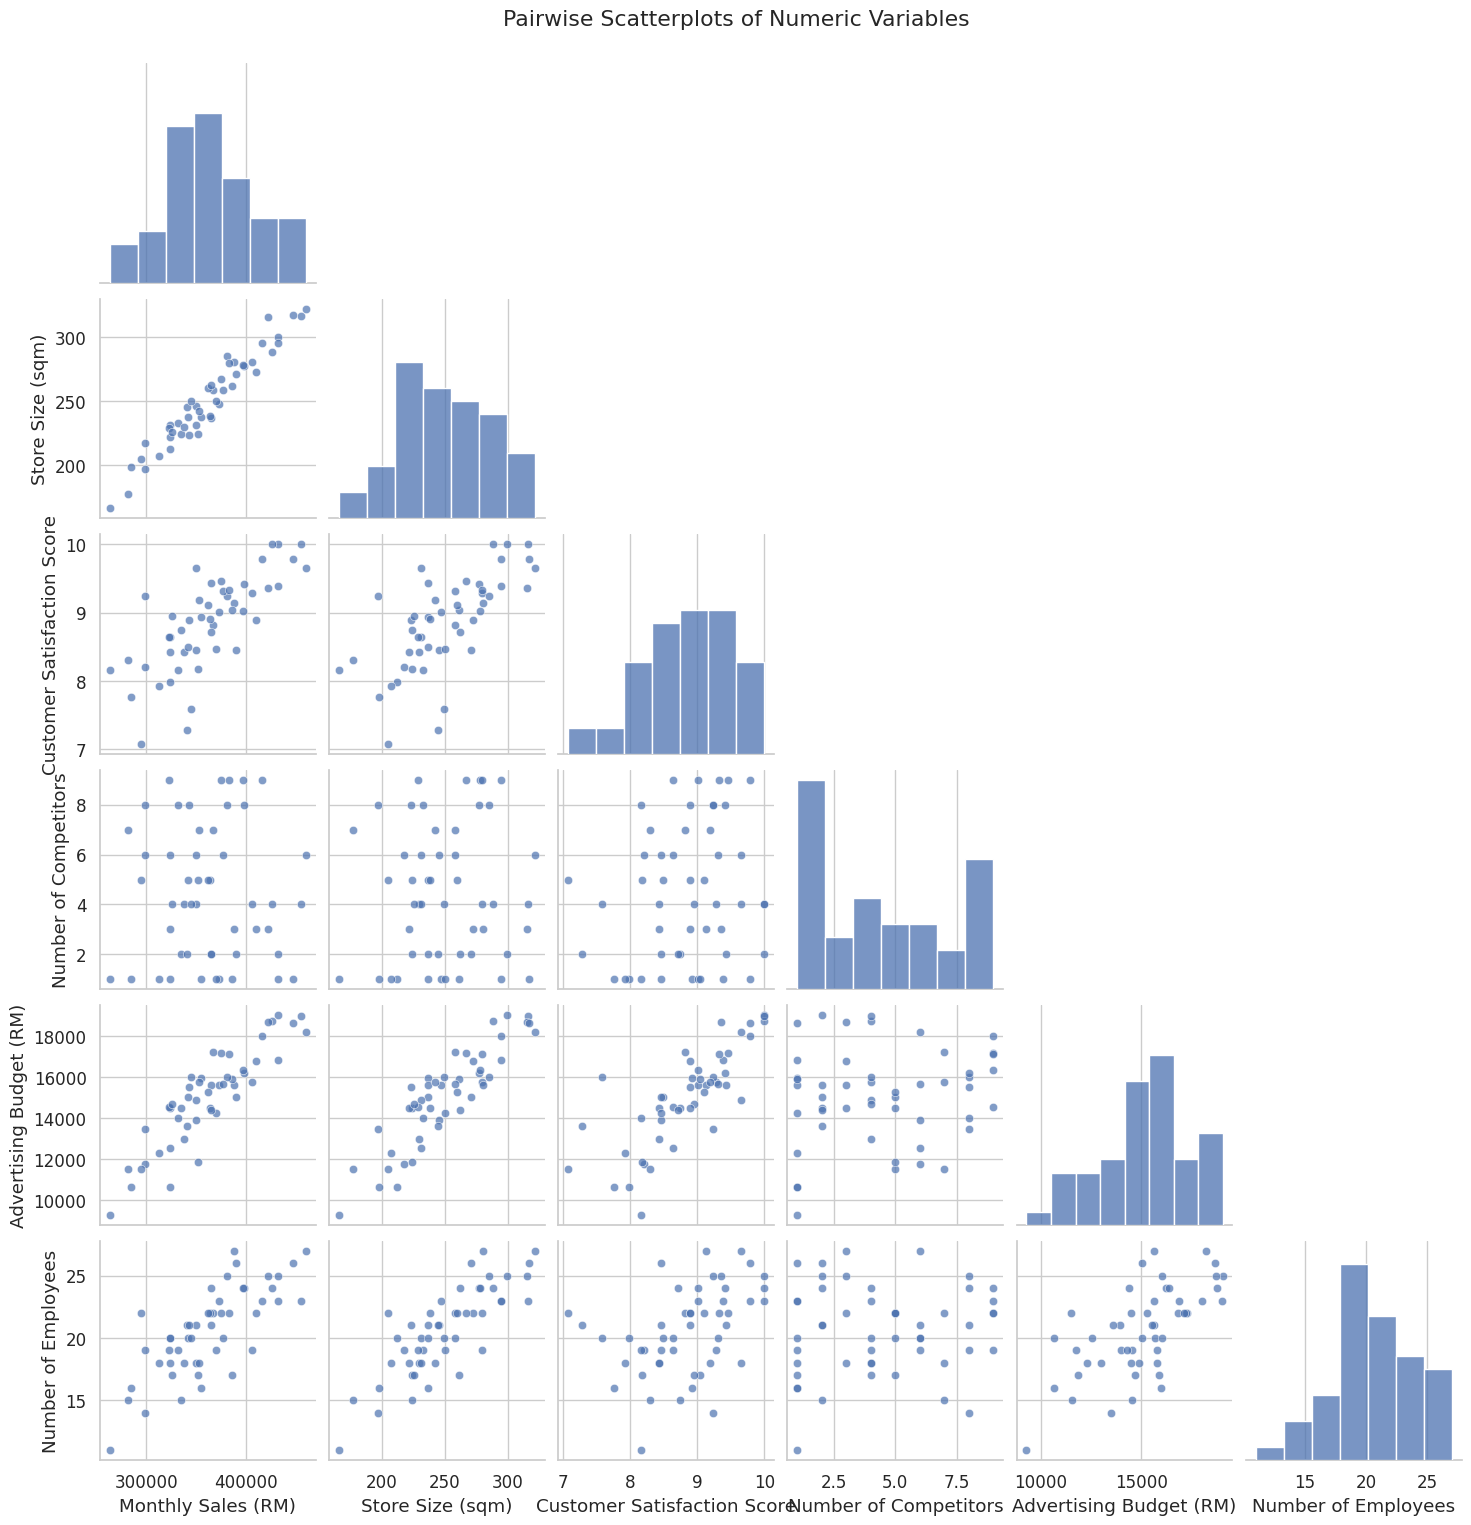

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your data
df = pd.read_excel("RetailSalesPerformance.xlsx")

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create pairplot
sns.pairplot(numeric_df, corner=True, plot_kws={'alpha': 0.7})
plt.suptitle("Pairwise Scatterplots of Numeric Variables", y=1.02)
plt.show()


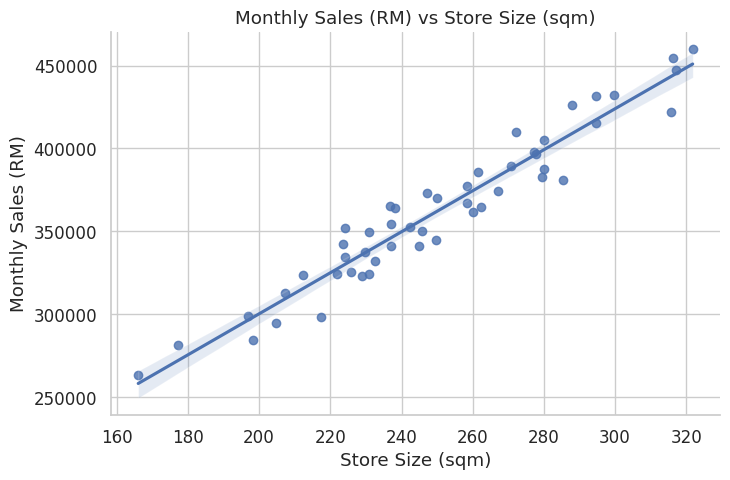

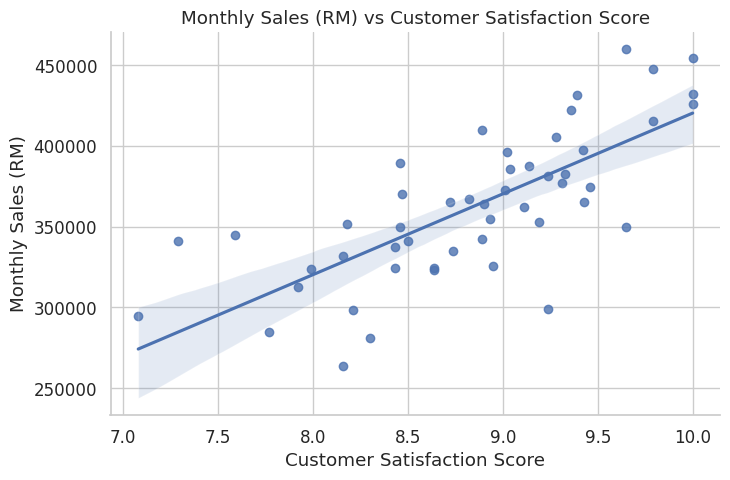

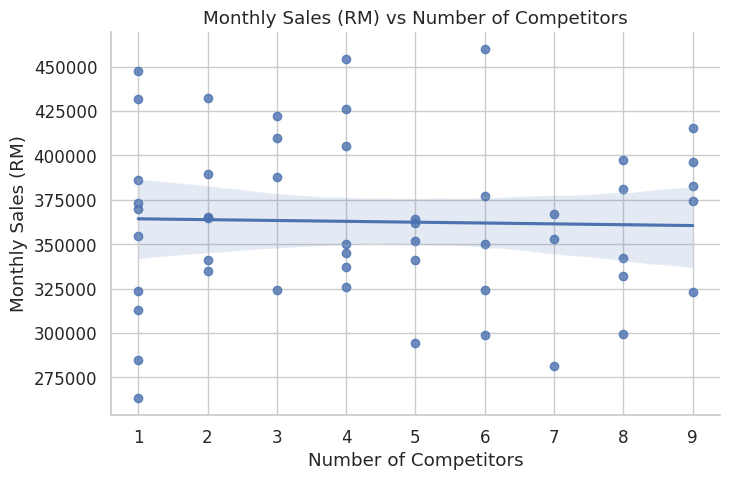

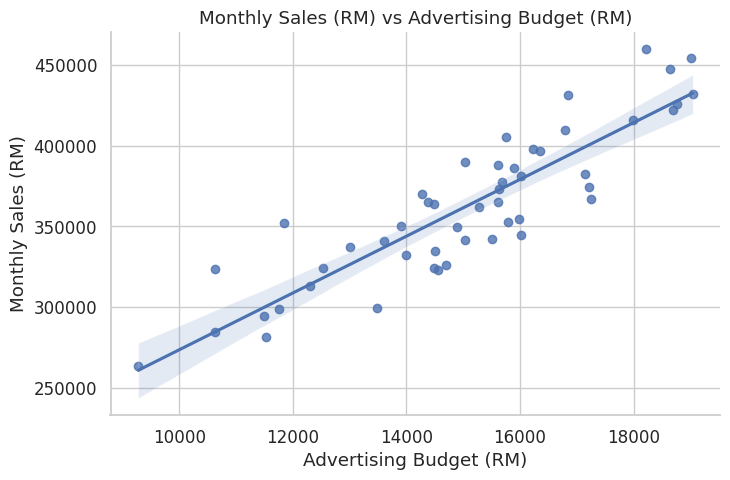

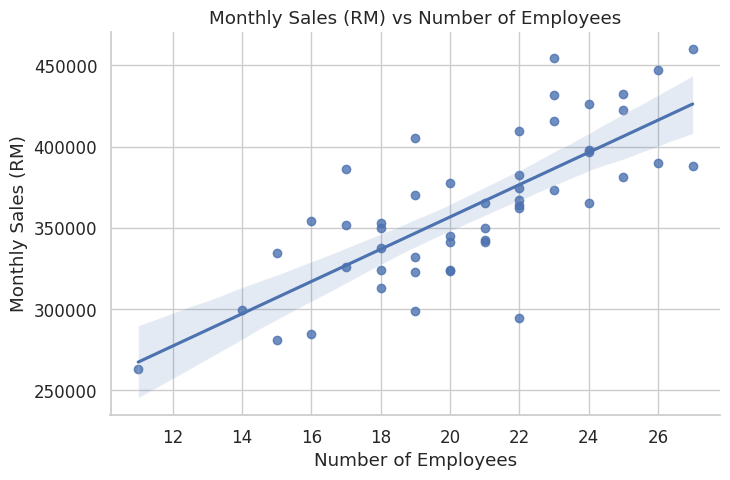

In [ ]:
# Replace with actual column names if needed
dependent_var = 'Monthly Sales (RM)'

# Loop through other numeric columns
for col in numeric_df.columns:
    if col != dependent_var:
        sns.lmplot(x=col, y=dependent_var, data=numeric_df, height=5, aspect=1.5)
        plt.title(f"{dependent_var} vs {col}")
        plt.tight_layout()
        plt.show()
